# testar alguns modelos de machine learn para 

Perguntas dessa tarefa
"Nossa taxa de inadimplência é de 35%. Você acha que com o uso das suas técnicas, conseguimos baixar este índice para pelo menos, 25%?"

Crie um modelos de machine learning e tente chegar a um índice de inadimplência aproximado, de 25%.

Francisco Santos

# Bibliotecas

In [41]:
import pandas as pd
import numpy as np
#visualização
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
# ML Naive Bayes
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix

# Importações dos dados

In [2]:
df = pd.read_csv('Credito1.csv' , engine = 'python',sep=';')

# Entendendo os dados

In [74]:
# Visualizar a primeira linhas
df.head().T

,0,1,2,3,4
CHEQUEESPECIAL,<0,0<=X<200,sem cheque,<0,<0
USO_CREDITO,6,48,12,42,24
HISTORICO_CREDITO,crítica / outros de crédito existente,existente e pago,crítica / outros de crédito existente,existente e pago,atrasos anteriores
PROPOSITO,Computador/TV,Computador/TV,educação,mobilia/equipamento,carro novo
BALANCO_ATUAL,1169,5951,2096,7882,4870
BALANCO_MEDIO_CREDITO,nenhuma economia conhecida,<100,<100,<100,<100
EMPREGADO,>=7,1<=X<4,4<=X<7,4<=X<7,1<=X<4
LOCAL,4,2,2,2,3
ESTADOCIVIL,masculino solteiro,fem div/cas,masculino solteiro,masculino solteiro,masculino solteiro
OUTRASFUNCOES,nenhum,nenhum,nenhum,fiador,nenhum


In [9]:
# informações do dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
CHEQUEESPECIAL           1000 non-null object
USO_CREDITO              1000 non-null int64
HISTORICO_CREDITO        1000 non-null object
PROPOSITO                1000 non-null object
BALANCO_ATUAL            1000 non-null int64
BALANCO_MEDIO_CREDITO    1000 non-null object
EMPREGADO                1000 non-null object
LOCAL                    1000 non-null int64
ESTADOCIVIL              1000 non-null object
OUTRASFUNCOES            1000 non-null object
RESIDENCIADESDE          1000 non-null int64
TIPOSBENS                1000 non-null object
IDADE                    1000 non-null int64
OUTROSPLANOSPGTO         1000 non-null object
RESIDENCIA               1000 non-null object
CREDITOSEXISTENTES       1000 non-null int64
EMPREGO                  1000 non-null object
DEPENDENTES              1000 non-null int64
TRABAESTRANGEIRO         1000 non-null object
CLASSE                   10

In [12]:
# verificando quais colunas tem valores nulos 
df.isnull().sum()

CHEQUEESPECIAL           0
USO_CREDITO              0
HISTORICO_CREDITO        0
PROPOSITO                0
BALANCO_ATUAL            0
BALANCO_MEDIO_CREDITO    0
EMPREGADO                0
LOCAL                    0
ESTADOCIVIL              0
OUTRASFUNCOES            0
RESIDENCIADESDE          0
TIPOSBENS                0
IDADE                    0
OUTROSPLANOSPGTO         0
RESIDENCIA               0
CREDITOSEXISTENTES       0
EMPREGO                  0
DEPENDENTES              0
TRABAESTRANGEIRO         0
CLASSE                   0
dtype: int64

In [13]:
# dados Estatisticos 
df.describe()

,USO_CREDITO,BALANCO_ATUAL,LOCAL,RESIDENCIADESDE,IDADE,CREDITOSEXISTENTES,DEPENDENTES
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [14]:
# Visualizando os tipos colunas
df.dtypes

CHEQUEESPECIAL           object
USO_CREDITO               int64
HISTORICO_CREDITO        object
PROPOSITO                object
BALANCO_ATUAL             int64
BALANCO_MEDIO_CREDITO    object
EMPREGADO                object
LOCAL                     int64
ESTADOCIVIL              object
OUTRASFUNCOES            object
RESIDENCIADESDE           int64
TIPOSBENS                object
IDADE                     int64
OUTROSPLANOSPGTO         object
RESIDENCIA               object
CREDITOSEXISTENTES        int64
EMPREGO                  object
DEPENDENTES               int64
TRABAESTRANGEIRO         object
CLASSE                   object
dtype: object

In [3]:
# fazendo agrupamento por Classe somando a coluna Uso Credito 
agrupado= df.groupby(['CLASSE'])['USO_CREDITO'].sum()
agrupado

CLASSE
bom     13445
ruim     7458
Name: USO_CREDITO, dtype: int64

In [4]:
# fazendo agrupamento por Classe somando a coluna Uso Credito 
agrupado2= df.groupby(['CLASSE'])['IDADE'].mean()
agrupado2

CLASSE
bom     36.224286
ruim    33.963333
Name: IDADE, dtype: float64

In [5]:
# fazendo agrupamento por Classe contando a coluna Uso Credito existentes
agrupado3= df.groupby(['CLASSE'])['CREDITOSEXISTENTES'].count()
agrupado3

CLASSE
bom     700
ruim    300
Name: CREDITOSEXISTENTES, dtype: int64

In [7]:
# fazendo agrupamento por Classe somando a coluna Uso Dependentes 
agrupado4= df.groupby(['CLASSE'])['DEPENDENTES'].sum()
agrupado4

CLASSE
bom     809
ruim    346
Name: DEPENDENTES, dtype: int64

In [18]:
bons = df.loc[df.CLASSE == 'bom']
bons.head()

,CHEQUEESPECIAL,USO_CREDITO,HISTORICO_CREDITO,PROPOSITO,BALANCO_ATUAL,BALANCO_MEDIO_CREDITO,EMPREGADO,LOCAL,ESTADOCIVIL,OUTRASFUNCOES,RESIDENCIADESDE,TIPOSBENS,IDADE,OUTROSPLANOSPGTO,RESIDENCIA,CREDITOSEXISTENTES,EMPREGO,DEPENDENTES,TRABAESTRANGEIRO,CLASSE
0,<0,6,crítica / outros de crédito existente,Computador/TV,1169,nenhuma economia conhecida,>=7,4,masculino solteiro,nenhum,4,bens imóveis,67,nenhum,própria,2,especializado,1,sim,bom
2,sem cheque,12,crítica / outros de crédito existente,educação,2096,<100,4<=X<7,2,masculino solteiro,nenhum,3,bens imóveis,49,nenhum,própria,1,não especializado,2,sim,bom
3,<0,42,existente e pago,mobilia/equipamento,7882,<100,4<=X<7,2,masculino solteiro,fiador,4,seguro de vida,45,nenhum,gratuitamente,1,especializado,2,sim,bom
5,sem cheque,36,existente e pago,educação,9055,nenhuma economia conhecida,1<=X<4,2,masculino solteiro,nenhum,4,nenhuma conhecida,35,nenhum,gratuitamente,1,não especializado,2,sim,bom
6,sem cheque,24,existente e pago,mobilia/equipamento,2835,500<=X<1000,>=7,3,masculino solteiro,nenhum,4,seguro de vida,53,nenhum,própria,1,especializado,1,sim,bom


In [14]:
agrupado5= bons.groupby(['PROPOSITO'])['CLASSE'].count()
agrupado5

PROPOSITO
Computador/TV          218
Eletrodomésticos         8
carro novo             145
carro usado             86
educação                28
mobilia/equipamento    123
negócios                63
obras                   14
outros                   7
qualificação             8
Name: CLASSE, dtype: int64

In [19]:
ruim = df.loc[df.CLASSE == 'ruim']
ruim.head()

,CHEQUEESPECIAL,USO_CREDITO,HISTORICO_CREDITO,PROPOSITO,BALANCO_ATUAL,BALANCO_MEDIO_CREDITO,EMPREGADO,LOCAL,ESTADOCIVIL,OUTRASFUNCOES,RESIDENCIADESDE,TIPOSBENS,IDADE,OUTROSPLANOSPGTO,RESIDENCIA,CREDITOSEXISTENTES,EMPREGO,DEPENDENTES,TRABAESTRANGEIRO,CLASSE
1,0<=X<200,48,existente e pago,Computador/TV,5951,<100,1<=X<4,2,fem div/cas,nenhum,2,bens imóveis,22,nenhum,própria,1,especializado,1,sim,ruim
4,<0,24,atrasos anteriores,carro novo,4870,<100,1<=X<4,3,masculino solteiro,nenhum,4,nenhuma conhecida,53,nenhum,gratuitamente,2,especializado,2,sim,ruim
9,0<=X<200,30,crítica / outros de crédito existente,carro novo,5234,<100,desempregado,4,masculino casado/viuvo,nenhum,2,carro,28,nenhum,própria,2,alta qualificação/autonomo/Gerente,1,sim,ruim
10,0<=X<200,12,existente e pago,carro novo,1295,<100,<1,3,fem div/cas,nenhum,1,carro,25,nenhum,alugada,1,especializado,1,sim,ruim
11,<0,48,existente e pago,negócios,4308,<100,<1,3,fem div/cas,nenhum,4,seguro de vida,24,nenhum,alugada,1,especializado,1,sim,ruim


In [17]:
agrupado6= ruim.groupby(['PROPOSITO'])['CLASSE'].count()
agrupado6

PROPOSITO
Computador/TV          62
Eletrodomésticos        4
carro novo             89
carro usado            17
educação               22
mobilia/equipamento    58
negócios               34
obras                   8
outros                  5
qualificação            1
Name: CLASSE, dtype: int64

# Visualização grafica

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Histograma Idade')

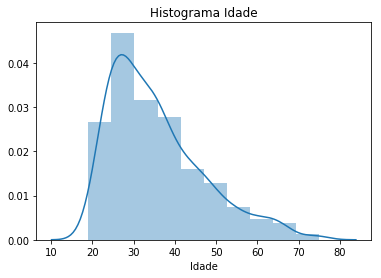

In [21]:
sns.distplot(df.IDADE, bins=10, axlabel="Idade").set_title("Histograma Idade")

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


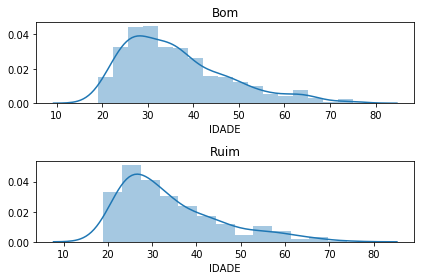

In [23]:
plt.figure()
plt.subplot(2,1,1)
sns.distplot(df.loc[df.CLASSE == 'bom'].IDADE).set_title("Bom")
plt.subplot(2,1,2)
sns.distplot(df.loc[df.CLASSE == 'ruim'].IDADE).set_title("Ruim")
plt.tight_layout()


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


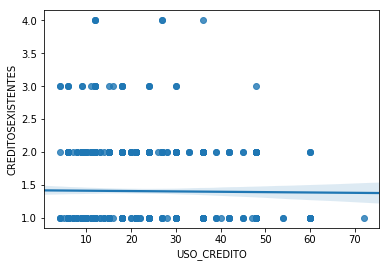

In [31]:
sns.regplot(df.USO_CREDITO, df.CREDITOSEXISTENTES, data=df)

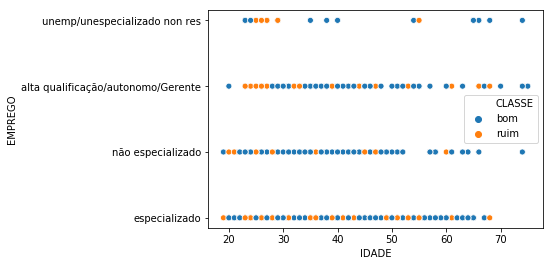

In [33]:
sns.scatterplot(df.IDADE, df.EMPREGO, hue= df.CLASSE)

Text(0.5, 1.0, 'Idade')

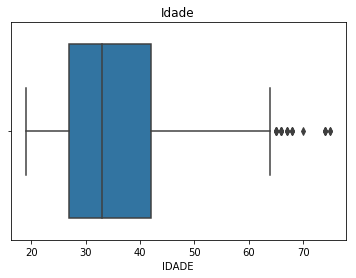

In [34]:
sns.boxplot(df.IDADE).set_title("Idade")

# Machine Learning 

In [42]:
previsores = df.iloc[:,0:19].values

In [43]:
previsores[0]

array(['<0', 6, 'crítica / outros de crédito existente', 'Computador/TV',
       1169, 'nenhuma economia conhecida', '>=7', 4, 'masculino solteiro',
       'nenhum', 4, 'bens imóveis', 67, 'nenhum', 'própria', 2,
       'especializado', 1, 'sim'], dtype=object)

In [45]:
classe = df.iloc[:,19].values

In [46]:
classe[:10]

array(['bom', 'ruim', 'bom', 'bom', 'ruim', 'bom', 'bom', 'bom', 'bom',
       'ruim'], dtype=object)

In [47]:
# Converter valores categorico em numericos para trabalhar com GaussianNBabs

labelEncoder = LabelEncoder()
previsores[:,0] = labelEncoder.fit_transform(previsores[:,0])
previsores[:,2] = labelEncoder.fit_transform(previsores[:,2])
previsores[:,3] = labelEncoder.fit_transform(previsores[:,3])
previsores[:,5] = labelEncoder.fit_transform(previsores[:,5])
previsores[:,6] = labelEncoder.fit_transform(previsores[:,6])
previsores[:,8] = labelEncoder.fit_transform(previsores[:,8])
previsores[:,9] = labelEncoder.fit_transform(previsores[:,9])
previsores[:,11] = labelEncoder.fit_transform(previsores[:,11])
previsores[:,13] = labelEncoder.fit_transform(previsores[:,13])
previsores[:,14] = labelEncoder.fit_transform(previsores[:,14])
previsores[:,16] = labelEncoder.fit_transform(previsores[:,16])
previsores[:,18] = labelEncoder.fit_transform(previsores[:,18])


In [48]:
previsores[0:5]

array([[1, 6, 1, 0, 1169, 4, 3, 4, 3, 2, 4, 0, 67, 1, 2, 2, 1, 1, 1],
       [0, 48, 2, 0, 5951, 2, 0, 2, 0, 2, 2, 0, 22, 1, 2, 1, 1, 1, 1],
       [3, 12, 1, 4, 2096, 2, 1, 2, 3, 2, 3, 0, 49, 1, 2, 1, 2, 2, 1],
       [1, 42, 2, 5, 7882, 2, 1, 2, 3, 1, 4, 3, 45, 1, 1, 1, 1, 2, 1],
       [1, 24, 0, 2, 4870, 2, 0, 3, 3, 2, 4, 2, 53, 1, 1, 2, 1, 2, 1]],
      dtype=object)

In [49]:
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(previsores, classe, test_size = 0.3, random_state = 0)

In [50]:
print(x_treinamento[0])
print(y_treinamento[0])

[0 24 1 8 11938 2 0 2 3 0 3 1 39 1 2 2 0 2 1]
ruim


In [51]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_treinamento, y_treinamento)

GaussianNB(priors=None, var_smoothing=1e-09)

In [52]:
previsoes = naive_bayes.predict(x_teste)

In [53]:
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[167,  47],
       [ 42,  44]], dtype=int64)

In [54]:
taxa_acerto = accuracy_score(y_teste,previsoes)
taxa_acerto

0.7033333333333334

In [55]:
taxa_erro = 1- taxa_acerto
taxa_erro

0.29666666666666663

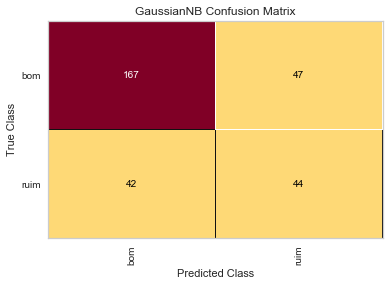

In [56]:
#Visualizador 

v = ConfusionMatrix(GaussianNB())
v.fit(x_treinamento, y_treinamento)
v.score(x_teste, y_teste)
v.poof()

# Testar Modelo

In [58]:
df_teste = pd.read_csv('Credito2.csv' , engine = 'python',sep=';')

In [59]:
df_teste.head()

,CHEQUEESPECIAL,USO_CREDITO,HISTORICO_CREDITO,PROPOSITO,BALANCO_ATUAL,BALANCO_MEDIO_CREDITO,EMPREGADO,LOCAL,ESTADOCIVIL,OUTRASFUNCOES,RESIDENCIADESDE,TIPOSBENS,IDADE,OUTROSPLANOSPGTO,RESIDENCIA,CREDITOSEXISTENTES,EMPREGO,DEPENDENTES,TRABAESTRANGEIRO,CLASSE
0,<0,6,crítica / outros de crédito existente,Computador/TV,1169,nenhuma economia conhecida,>=7,4,masculino solteiro,nenhum,4,bens imóveis,67,nenhum,própria,2,especializado,1,sim,bom
1,0<=X<200,48,existente e pago,Computador/TV,5951,<100,1<=X<4,2,fem div/cas,nenhum,2,bens imóveis,22,nenhum,própria,1,especializado,1,sim,ruim
2,sem cheque,12,crítica / outros de crédito existente,educação,2096,<100,4<=X<7,2,masculino solteiro,nenhum,3,bens imóveis,49,nenhum,própria,1,não especializado,2,sim,bom
3,<0,42,existente e pago,mobilia/equipamento,7882,<100,4<=X<7,2,masculino solteiro,fiador,4,seguro de vida,45,nenhum,gratuitamente,1,especializado,2,sim,bom
4,<0,24,atrasos anteriores,carro novo,4870,<100,1<=X<4,3,masculino solteiro,nenhum,4,nenhuma conhecida,53,nenhum,gratuitamente,2,especializado,2,sim,ruim


In [60]:
previsores_teste = df_teste.iloc[:,0:19].values

In [61]:
labelEncoder = LabelEncoder()
previsores_teste[:,0] = labelEncoder.fit_transform(previsores_teste[:,0])
previsores_teste[:,2] = labelEncoder.fit_transform(previsores_teste[:,2])
previsores_teste[:,3] = labelEncoder.fit_transform(previsores_teste[:,3])
previsores_teste[:,5] = labelEncoder.fit_transform(previsores_teste[:,5])
previsores_teste[:,6] = labelEncoder.fit_transform(previsores_teste[:,6])
previsores_teste[:,8] = labelEncoder.fit_transform(previsores_teste[:,8])
previsores_teste[:,9] = labelEncoder.fit_transform(previsores_teste[:,9])
previsores_teste[:,11] = labelEncoder.fit_transform(previsores_teste[:,11])
previsores_teste[:,13] = labelEncoder.fit_transform(previsores_teste[:,13])
previsores_teste[:,14] = labelEncoder.fit_transform(previsores_teste[:,14])
previsores_teste[:,16] = labelEncoder.fit_transform(previsores_teste[:,16])
previsores_teste[:,18] = labelEncoder.fit_transform(previsores_teste[:,18])

In [62]:
previsores_teste[0]

array([1, 6, 1, 0, 1169, 4, 3, 4, 3, 2, 4, 0, 67, 1, 2, 2, 1, 1, 1],
      dtype=object)

In [68]:
pevisao2 = naive_bayes.predict(previsores_teste)

In [65]:
classe2 = df_teste.iloc[:,19].values

In [71]:
confusao2 = confusion_matrix(classe2, pevisao2)
confusao2

array([[554, 146],
       [140, 160]], dtype=int64)

In [72]:
taxa_acerto2 = accuracy_score(classe2, pevisao2)
taxa_acerto2

0.714

In [73]:
taxa_erro2 = 1- taxa_acerto2
taxa_erro2

0.28600000000000003